<a href="https://colab.research.google.com/github/agrim-sri/IITD-AIA_FSM/blob/main/K_Means_Clustering_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load the dataset from CSV
dataset = pd.read_csv('Iris Dataset.csv')

# Access and work with the dataset
# For example, you can print the first few rows
print(dataset.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [14]:
def standardize(x):
    for i in range(x.shape[1]):
        x[:, i] = (x[:, i] - np.mean(x[:, i])) / np.std(x[:, i])
    return x

# Standardize the columns in x
x_standardized = standardize(x.values)


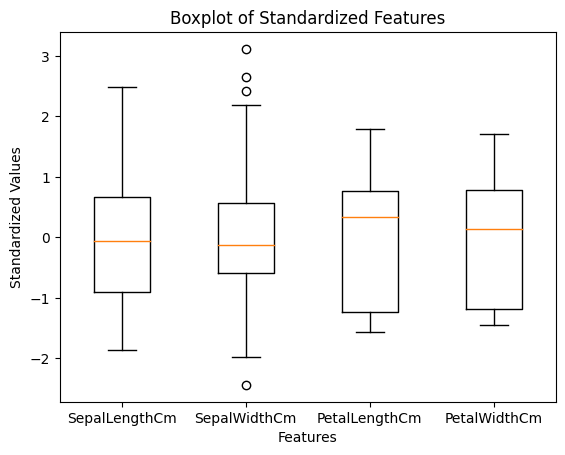

In [16]:
# Create a boxplot
plt.boxplot(x_standardized)
plt.xlabel('Features')
plt.ylabel('Standardized Values')
plt.title('Boxplot of Standardized Features')
plt.xticks(range(1, x_standardized.shape[1] + 1), x.columns)
plt.show()

In [27]:
def kmeans(X, K, max_iters=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the closest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # Stop if centroids do not change
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Load the dataset
df = pd.read_csv('Iris Dataset.csv')

# Remove the "Species" column
X = df.iloc[:, 1:5].values

# Perform K-Means clustering
labels, centroids = kmeans(X, K=3)

# Convert the "Species" column to numeric values
species_numeric = np.array(pd.factorize(df['Species'])[0])

# Compare cluster labels with numeric species values
table = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        table[i, j] = np.sum((labels == i) & (species_numeric == j))

print(table)

# Initialize centroid_new with zeros
centroid_new = np.zeros((3, 4))

while not np.all(centroids == centroid_new):
    centroid_new = centroids.copy()

    # Calculate distances to centroids
    dist_to_centroid = np.empty((X.shape[0], 3))
    for i in range(X.shape[0]):
        for j in range(3):
            dist_to_centroid[i, j] = np.sqrt(np.sum((X[i] - centroid_new[j]) ** 2))

    # Assign data points to categories
    category = np.empty(150)
    for i in range(150):
        category[i] = np.argmin(dist_to_centroid[i])

    # Update centroids
    for i in range(3):
        centroid_new[i] = np.mean(X[category == i], axis=0)

    centroids = centroid_new


[[50.  0.  0.]
 [ 0. 48. 14.]
 [ 0.  2. 36.]]


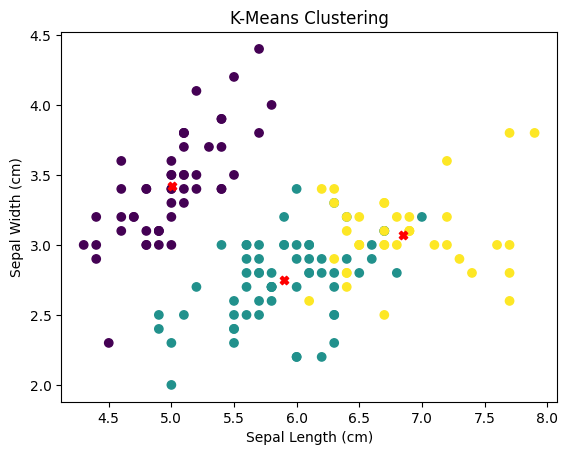

In [28]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering')
plt.show()

In [24]:
def kmeans(X, K, max_iters=100):
    # K-Means implementation code
    
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the closest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # Stop if centroids do not change
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels

# Load the dataset
df = pd.read_csv('Iris Dataset.csv')

# Remove the "Species" column
X = df.iloc[:, 1:5].values

# Convert the "Species" column to numeric values
species_numeric = np.array(pd.factorize(df['Species'])[0])

# Perform K-Means clustering
labels = kmeans(X, K=3)

# Compare cluster labels with numeric species values
table = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        table[i, j] = np.sum((labels == i) & (species_numeric == j))

print(table)

[[ 0.  2. 36.]
 [ 0. 48. 14.]
 [50.  0.  0.]]


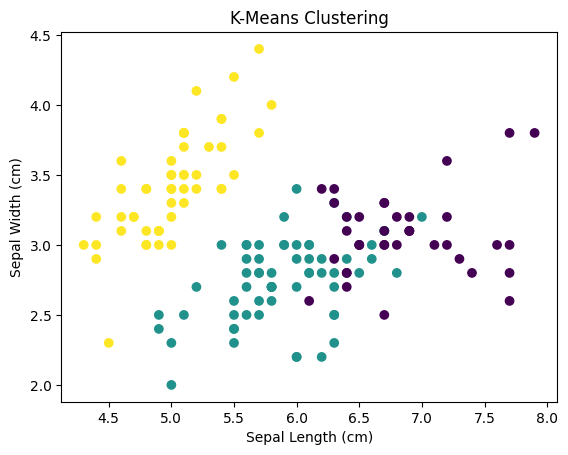

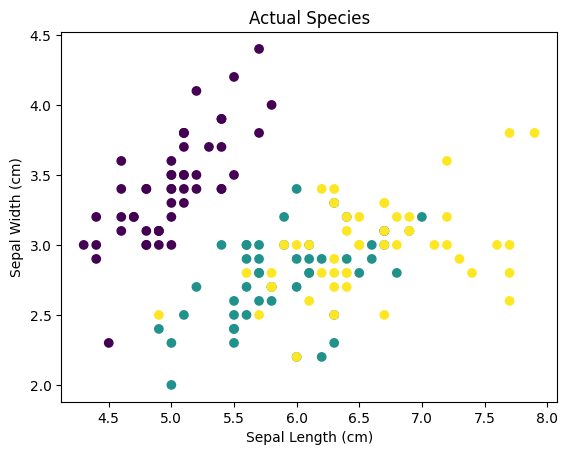

In [25]:
# Create a scatter plot of the K-Means clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering')
plt.show()

# Create a scatter plot of the actual species
plt.scatter(X[:, 0], X[:, 1], c=species_numeric, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Actual Species')
plt.show()

# Principal Component Analysis (PCA) 

In [29]:
def pca(X, n_components=2):
    # Standardize the data
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Compute the covariance matrix
    cov_matrix = np.cov(X_std.T)

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top n_components eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Transform the data to the new feature space
    X_pca = np.dot(X_std, selected_eigenvectors)

    return X_pca, selected_eigenvectors, sorted_eigenvalues

In [30]:
X_pca, eigenvectors, eigenvalues = pca(X, n_components=3)

# Print the eigenvalues
print("Eigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvalue {i+1}: {eigenvalue}")

Eigenvalues:
Eigenvalue 1: 2.930353775589317
Eigenvalue 2: 0.9274036215173419
Eigenvalue 3: 0.14834222648163944
Eigenvalue 4: 0.02074601399559593


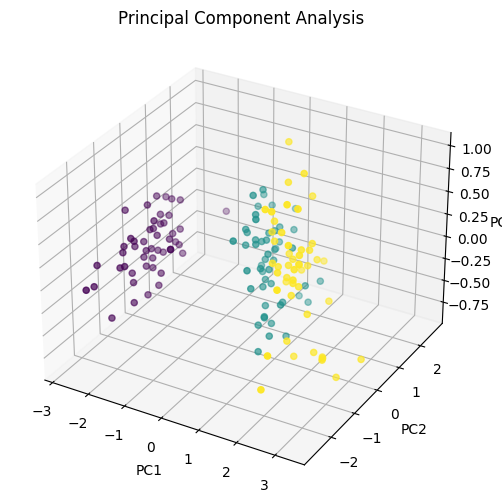

In [31]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}), cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Principal Component Analysis')
plt.show()